In [29]:
import pandas as pd

# Mapping the Rise: Streaming Success of Female Rappers by City

**Data Storytelling**

For decades, female rappers have faced systemic barriers in the music industry, from limited radio play and industry bias to underrepresentation in major playlists. Despite these challenges, the past few years have marked a turning point, with a significant rise in the visibility, streaming numbers, and chart performance of female rap artists.

This project investigates a key question: **which U.S. cities are most successful at producing and sustaining female rap talent?** Using a combination of historical Billboard data, Spotify streaming metrics, and editorial sources like TIDAL and Complex, I will analyze where top female rappers come from, how their success is shaped by geography, and how these patterns can help predict future hits or detect future stars.

I will integrate data from:
- **Billboard Hot 100**: to track historical chart presence.
- **Spotify’s Top 10k and Hip Hop datasets**: to evaluate streaming performance.
- **TIDAL playlists**: to highlight artist inclusion and editorial recognition.
- **Complex's best rap cities**: to contextualize the role of geography.

The project answers questions like:
- Which cities consistently produce successful female rap artists?
- Are musical characteristics like tempo or duration linked to a track's success?
- Is there a connection between a city's representation and its artists' streaming numbers or hit rates?

This analysis helps prepare for a future model that can predict which female rap songs might become hits, using data on the artist, their city, and past success.

# 1. Data Import And Cleaning

In [31]:
# TIDAL 
tidal_df = pd.read_csv("tidal_female_rappers_with_city.csv", sep=";")

# Spotify Hip Hop 
spotify_hiphop_df = pd.read_csv("spotify_top_hiphop_artists_tracks_cities.csv", sep=";", engine="python", on_bad_lines="skip")

# Spotify Top 10k 
spotify_10k_df = pd.read_csv("spotify_top_10k_streamed_songs.csv", engine="python", on_bad_lines="skip")

# Complex 
complex_cities_df = pd.read_csv("complex_best_rap_cities.csv")

# Billboard
billboard_df = pd.read_csv("billboard_hot_100_with_city.csv", engine="python", on_bad_lines="skip")

In [33]:
print("TIDAL")
display(tidal_df.head())

print("Spotify Hip Hop")
display(spotify_hiphop_df.head())

print("Spotify 10k")
display(spotify_10k_df.head())

print("Complex")
display(complex_cities_df.head())

print("Billboard")
display(billboard_df.head())

TIDAL


,Ranking,track_name,artist,artist_id,Album,duration,track_id,city,gender
0,1,Bodak Yellow,Cardi B,7301626,Bodak Yellow,224,75065103,"New York, NY",female
1,2,Work It,Missy Elliott,14686,Under Construction,263,533969,"Portsmouth, VA",female
2,3,Conceited (There's Something About Remy),Remy Ma,27435,There's Something About Remy-Based On A True S...,220,37751158,"New York, NY",female
3,4,Let Me Blow Ya Mind,Eve,18615,Scorpion,230,616971,"Philadelphia, PA",female
4,5,Lighters Up,Lil' Kim,14963,Lighters Up,263,10905756,"Brooklyn, NY",female


Spotify Hip Hop


,artist,track_name,ranking,duration (ms),track_id,city,gender
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,"Toronto, Canada",male
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,"Toronto, Canada",male
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE,"Toronto, Canada",male
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU,"Toronto, Canada",male
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe,"Toronto, Canada",male


Spotify 10k


,ranking;artist;track_name;days;top 10 (xtimes);peak_position;peak_position (xtimes);peak_streams;total_streams;gender;city
1;Post Malone ;Sunflower SpiderMan: Into the SpiderVerse;1506;302.0;1;(x29);2118242;883369738;male;Syracuse,NY
2;Juice WRLD ;Lucid Dreams;1673;178.0;1;(x20);2127668;864832399;male;Chicago,IL
3;Lil Uzi Vert ;XO TOUR Llif3;1853;212.0;1;(x4);1660502;781153024;male;Philadelphia,PA
4;J. Cole ;No Role Modelz;2547;6.0;7;0;659366;734857487;male;Fayetteville,NC
5;Post Malone ;rockstar;1223;186.0;1;(x124);2905678;718865961;male;Syracuse,NY


Complex


,artist;City;gender
Future ;Atlanta,GA;male
Young Thug;Atlanta,GA;male
Lil Baby;Atlanta,GA;male
Latto;Atlanta,GA;female
21 Savage;Atlanta,GA;male


Billboard


,date;ranking;track_name;artist;last-week;peak-rank;weeks-on-board;city;gender
2021-11-06;1;Easy On Me;adele;1.0;1;3;London,UK;unknown
2021-11-06;2;Stay;the kid laroi;2.0;1;16;Sydney,Australia;unknown
2021-11-06;3;Industry Baby;lil nas;3.0;1;14;;unknown,None
2021-11-06;4;Fancy Like;walker hayes;4.0;3;19;Mobile,AL;unknown
2021-11-06;5;Bad Habits;ed sheeran;5.0;2;18;Halifax,UK;unknown


In [35]:
# Spotify 10k with separator
spotify_10k_df = pd.read_csv("spotify_top_10k_streamed_songs.csv", sep=";", engine="python", on_bad_lines="skip")

# Complex with separator
complex_cities_df = pd.read_csv("complex_best_rap_cities.csv", sep=";", engine="python", on_bad_lines="skip")

# Billboard with separator
billboard_df = pd.read_csv("billboard_hot_100_with_city.csv", sep=";", engine="python", on_bad_lines="skip")

In [37]:
print("Spotify 10k")
display(spotify_10k_df.head())

print("Complex")
display(complex_cities_df.head())

print("Billboard")
display(billboard_df.head())

Spotify 10k


,ranking,artist,track_name,days,top 10 (xtimes),peak_position,peak_position (xtimes),peak_streams,total_streams,gender,city
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738,male,"Syracuse, NY"
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399,male,"Chicago, IL"
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024,male,"Philadelphia, PA"
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487,male,"Fayetteville, NC"
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961,male,"Syracuse, NY"


Complex


,artist,City,gender
0,Future,"Atlanta, GA",male
1,Young Thug,"Atlanta, GA",male
2,Lil Baby,"Atlanta, GA",male
3,Latto,"Atlanta, GA",female
4,21 Savage,"Atlanta, GA",male


Billboard


,date,ranking,track_name,artist,last-week,peak-rank,weeks-on-board,city,gender
0,2021-11-06,1,Easy On Me,adele,1.0,1,3,"London, UK",unknown
1,2021-11-06,2,Stay,the kid laroi,2.0,1,16,"Sydney, Australia",unknown
2,2021-11-06,3,Industry Baby,lil nas,3.0,1,14,NaN,unknown
3,2021-11-06,4,Fancy Like,walker hayes,4.0,3,19,"Mobile, AL",unknown
4,2021-11-06,5,Bad Habits,ed sheeran,5.0,2,18,"Halifax, UK",unknown


In [39]:
# Standardize city names
def clean_city(city):
    if pd.isnull(city):
        return None
    return city.split(',')[0].strip().lower()

tidal_df['city_clean'] = tidal_df['city'].apply(clean_city)
spotify_hiphop_df['city_clean'] = spotify_hiphop_df['city'].apply(clean_city)
spotify_10k_df['city_clean'] = spotify_10k_df['city'].apply(clean_city)
complex_cities_df['city_clean'] = complex_cities_df['City'].apply(clean_city)
billboard_df['city_clean'] = billboard_df['city'].apply(clean_city)

In [41]:
tidal_df['city_clean'].value_counts().head()
spotify_hiphop_df['city_clean'].value_counts().head()
spotify_10k_df['city_clean'].value_counts().head()
complex_cities_df['city_clean'].value_counts().head()
billboard_df['city_clean'].value_counts().head()

city_clean
toronto    1494
atlanta     673
ontario     588
london      551
halifax     490
Name: count, dtype: int64

# 2. Data Profiling

In this section, I will examine the structure and contents of each dataset. This includes:

- The number of rows and columns
- The different data types 
- Potential missing values
- Descriptive statistics

This step helps identify the quality of the data, potential issues and determine how each dataset can contribute to the analysis.

In [43]:
print("TIDAL Dataset:")
print("Shape:", tidal_df.shape)
display(tidal_df.info())
print("\nMissing Values:")
display(tidal_df.isnull().sum())
display(tidal_df.describe(include='all'))

TIDAL Dataset:
Shape: (81, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     81 non-null     int64 
 1   track_name  81 non-null     object
 2   artist      81 non-null     object
 3   artist_id   81 non-null     int64 
 4   Album       81 non-null     object
 5   duration    81 non-null     int64 
 6   track_id    81 non-null     int64 
 7   city        81 non-null     object
 8   gender      81 non-null     object
 9   city_clean  81 non-null     object
dtypes: int64(4), object(6)
memory usage: 6.5+ KB


None


Missing Values:


Ranking       0
track_name    0
artist        0
artist_id     0
Album         0
duration      0
track_id      0
city          0
gender        0
city_clean    0
dtype: int64

,Ranking,track_name,artist,artist_id,Album,duration,track_id,city,gender,city_clean
count,81.000000,81,81,8.100000e+01,81,81.000000,8.100000e+01,81,81,81
unique,NaN,75,14,NaN,46,NaN,NaN,9,1,9
top,NaN,Did It On’em,Nicki Minaj,NaN,The Pinkprint,NaN,NaN,"Queens, NY",female,queens
freq,NaN,2,33,NaN,8,NaN,NaN,33,81,33
mean,41.000000,NaN,NaN,1.990388e+06,NaN,232.271605,2.946322e+07,NaN,NaN,NaN
std,23.526581,NaN,NaN,2.092726e+06,NaN,35.013930,5.006683e+07,NaN,NaN,NaN
min,1.000000,NaN,NaN,8.940000e+02,NaN,158.000000,2.563280e+05,NaN,NaN,NaN
25%,21.000000,NaN,NaN,1.473900e+04,NaN,210.000000,2.529770e+06,NaN,NaN,NaN
50%,41.000000,NaN,NaN,3.316100e+04,NaN,230.000000,1.530028e+07,NaN,NaN,NaN
75%,61.000000,NaN,NaN,3.702744e+06,NaN,260.000000,3.865875e+07,NaN,NaN,NaN


In [45]:
print("\n\nSpotify Hip Hop Dataset:")
print("Shape:", spotify_hiphop_df.shape)
display(spotify_hiphop_df.info())
print("\nMissing Values:")
display(spotify_hiphop_df.isnull().sum())
display(spotify_hiphop_df.describe(include='all'))



Spotify Hip Hop Dataset:
Shape: (440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artist         440 non-null    object
 1   track_name     440 non-null    object
 2   ranking        440 non-null    int64 
 3   duration (ms)  440 non-null    int64 
 4   track_id       440 non-null    object
 5   city           440 non-null    object
 6   gender         440 non-null    object
 7   city_clean     440 non-null    object
dtypes: int64(2), object(6)
memory usage: 27.6+ KB


None


Missing Values:


artist           0
track_name       0
ranking          0
duration (ms)    0
track_id         0
city             0
gender           0
city_clean       0
dtype: int64

,artist,track_name,ranking,duration (ms),track_id,city,gender,city_clean
count,440,440,440.000000,440.000000,440,440,440,440
unique,117,412,NaN,NaN,413,69,4,67
top,Drake,Annihilate (Spider-Man: Across the Spider-Vers...,NaN,NaN,39MK3d3fonIP8Mz9oHCTBB,"Atlanta, GA",male,atlanta
freq,20,3,NaN,NaN,3,95,381,95
mean,NaN,NaN,75.736364,206810.040909,NaN,NaN,NaN,NaN
std,NaN,NaN,9.886534,53576.930289,NaN,NaN,NaN,NaN
min,NaN,NaN,29.000000,81666.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,70.000000,172778.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,77.000000,201866.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,83.000000,235119.750000,NaN,NaN,NaN,NaN


In [47]:
print("\n\nBillboard Dataset:")
print("Shape:", billboard_df.shape)
display(billboard_df.info())
print("\nMissing Values:")
display(billboard_df.isnull().sum())
display(billboard_df.describe(include='all'))



Billboard Dataset:
Shape: (330087, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   ranking         330087 non-null  int64  
 2   track_name      330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
 7   city            5981 non-null    object 
 8   gender          330087 non-null  object 
 9   city_clean      5981 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 25.2+ MB


None


Missing Values:


date                   0
ranking                0
track_name             0
artist                 0
last-week          32312
peak-rank              0
weeks-on-board         0
city              324106
gender                 0
city_clean        324106
dtype: int64

,date,ranking,track_name,artist,last-week,peak-rank,weeks-on-board,city,gender,city_clean
count,330087,330087.000000,330087,330087,297775.000000,330087.000000,330087.000000,5981,330087,5981
unique,3301,NaN,24620,7594,NaN,NaN,NaN,17,2,17
top,2021-11-06,NaN,Stay,drake,NaN,NaN,NaN,"Toronto, Canada",unknown,toronto
freq,100,NaN,224,1494,NaN,NaN,NaN,1494,328516,1494
mean,NaN,50.500929,NaN,NaN,47.591631,40.970629,9.161785,NaN,NaN,NaN
std,NaN,28.866094,NaN,NaN,28.054360,29.347481,7.618264,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,26.000000,NaN,NaN,23.000000,13.000000,4.000000,NaN,NaN,NaN
50%,NaN,51.000000,NaN,NaN,47.000000,38.000000,7.000000,NaN,NaN,NaN
75%,NaN,76.000000,NaN,NaN,72.000000,65.000000,13.000000,NaN,NaN,NaN


In [49]:
print("\n\nComplex Cities Dataset:")
print("Shape:", complex_cities_df.shape)
display(complex_cities_df.info())
print("\nMissing Values:")
display(complex_cities_df.isnull().sum())
display(complex_cities_df.describe(include='all'))



Complex Cities Dataset:
Shape: (155, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist      155 non-null    object
 1   City        155 non-null    object
 2   gender      155 non-null    object
 3   city_clean  155 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


None


Missing Values:


artist        0
City          0
gender        0
city_clean    0
dtype: int64

,artist,City,gender,city_clean
count,155,155,155,155
unique,155,10,2,10
top,Future,"Atlanta, GA",male,atlanta
freq,1,24,127,24


# 3. Data Visualization

Now I will explore the different key variables in the datasets. This step helps me:
- Understand the spread of numerical features
- Identify dominant artists and cities
- Spot any irregularities in the data.

I will use bar plots and histograms to visualize the distribution for artist counts, stream counts, track durations and rankings.

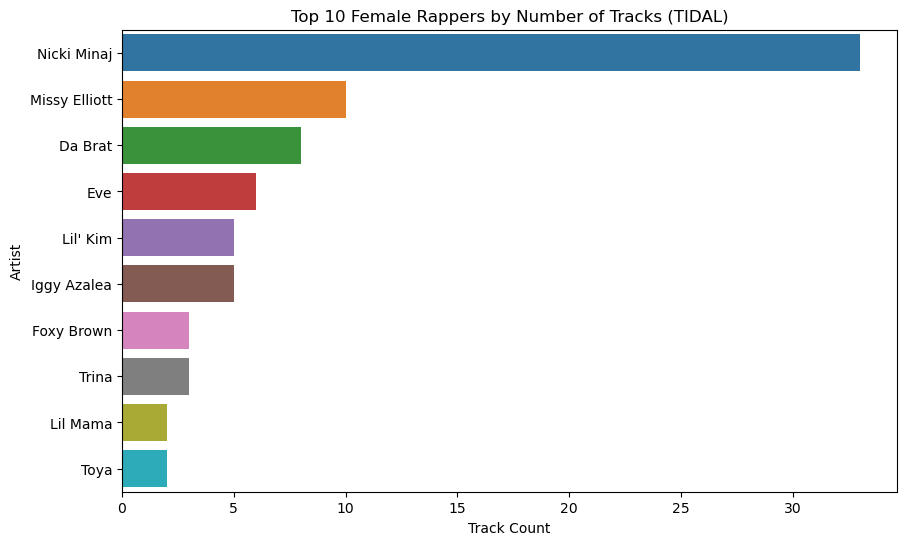

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

top_artists = tidal_df['artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_artists.values,
    y=top_artists.index,
    hue=top_artists.index,
    legend=False
)
plt.title('Top 10 Female Rappers by Number of Tracks (TIDAL)')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()

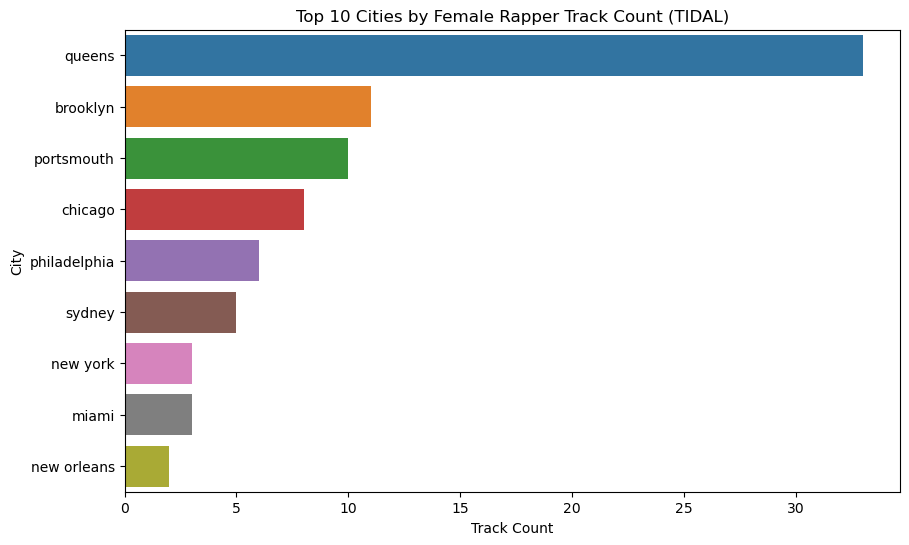

In [225]:
top_cities = tidal_df['city_clean'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    hue=top_cities.index,
    legend=False
)
plt.title('Top 10 Cities by Female Rapper Track Count (TIDAL)')
plt.xlabel('Track Count')
plt.ylabel('City')
plt.show()

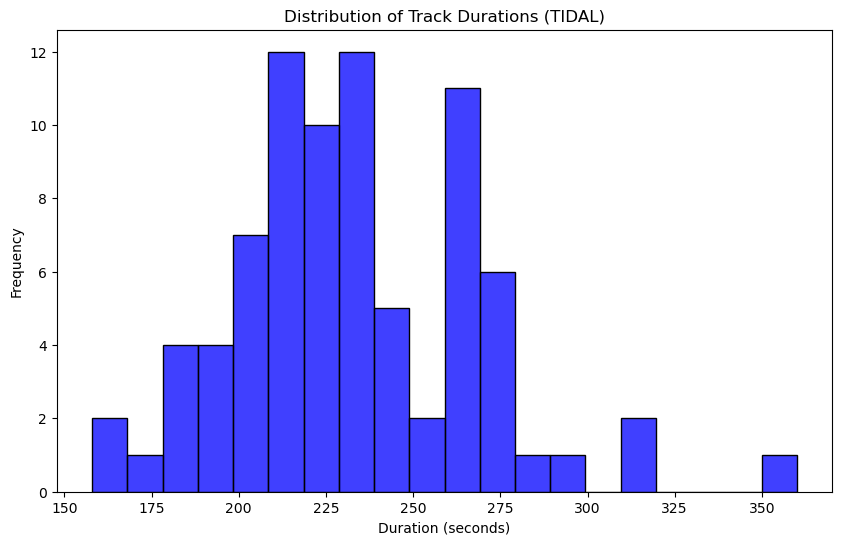

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(tidal_df['duration'], bins=20, color='blue')
plt.title('Distribution of Track Durations (TIDAL)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

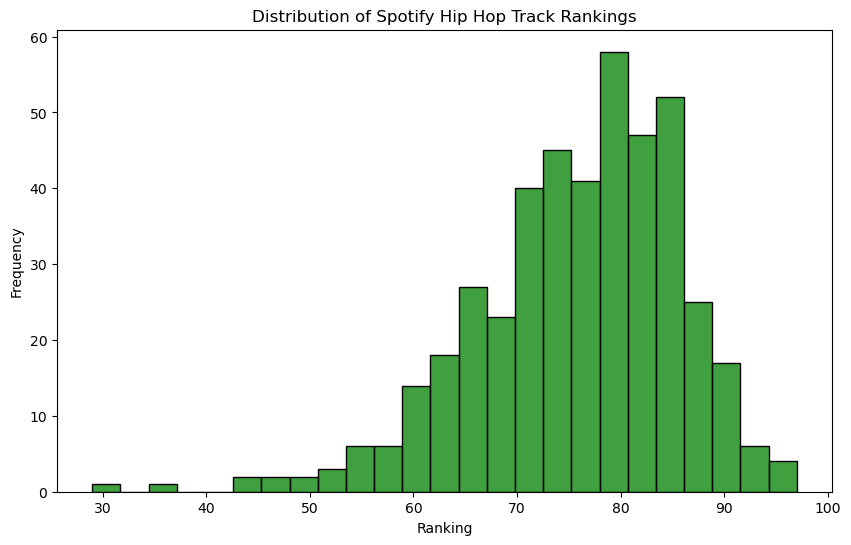

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_hiphop_df['ranking'], bins=25, color='green')
plt.title('Distribution of Spotify Hip Hop Track Rankings')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()

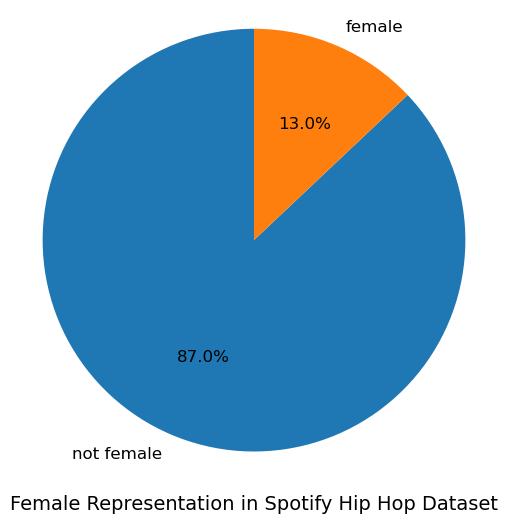

In [219]:
# Create a new column to group gender as 'female' and 'not female'
spotify_hiphop_df['is_female'] = spotify_hiphop_df['gender'].apply(lambda x: 'female' if x == 'female' else 'not female')

# Count the two groups
female_dist = spotify_hiphop_df['is_female'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    female_dist,
    labels=female_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Female Representation in Spotify Hip Hop Dataset', fontsize=14, y=-0.1)
plt.axis('equal')
plt.show()

# 4. Exploring Relationships

In this section, I will try to identify the relationships between numerical and categorical variables across the datasets. I will use:
- Correlation heatmaps to explore relationships between numerical variables.
- Scatter plots to explore trends (duration vs. ranking)
- Grouped comparisons (stream counts by city or gender).

These visualizations help me see which features might be useful in formulating hypotheses.

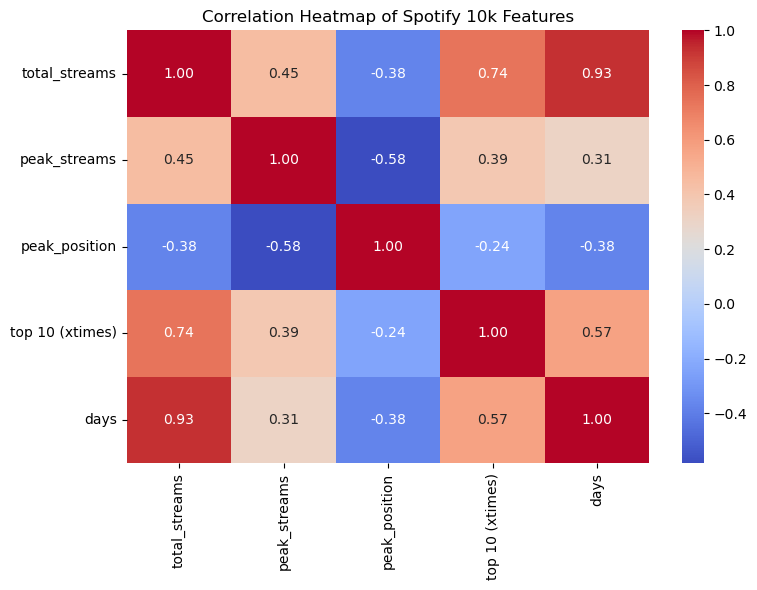

In [57]:
# Select relevant numeric columns for correlation
numeric_cols = ['total_streams', 'peak_streams', 'peak_position', 'top 10 (xtimes)', 'days']
spotify_corr = spotify_10k_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spotify_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Spotify 10k Features')
plt.tight_layout()
plt.show()

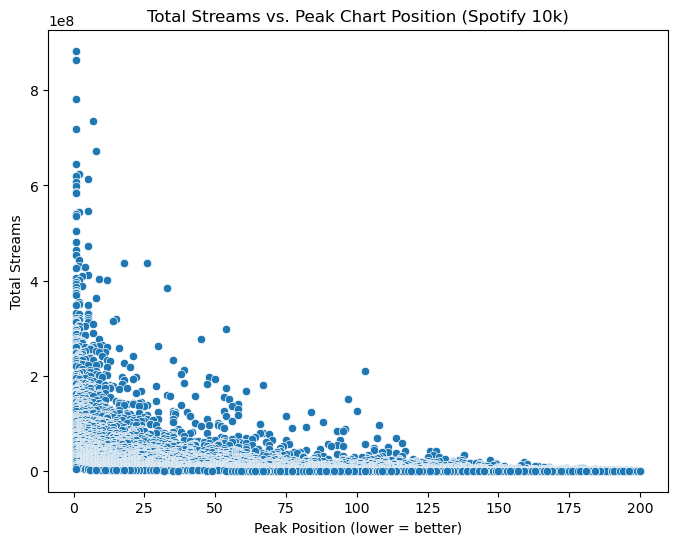

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_10k_df, x='peak_position', y='total_streams')
plt.title('Total Streams vs. Peak Chart Position (Spotify 10k)')
plt.xlabel('Peak Position (lower = better)')
plt.ylabel('Total Streams')
plt.show()

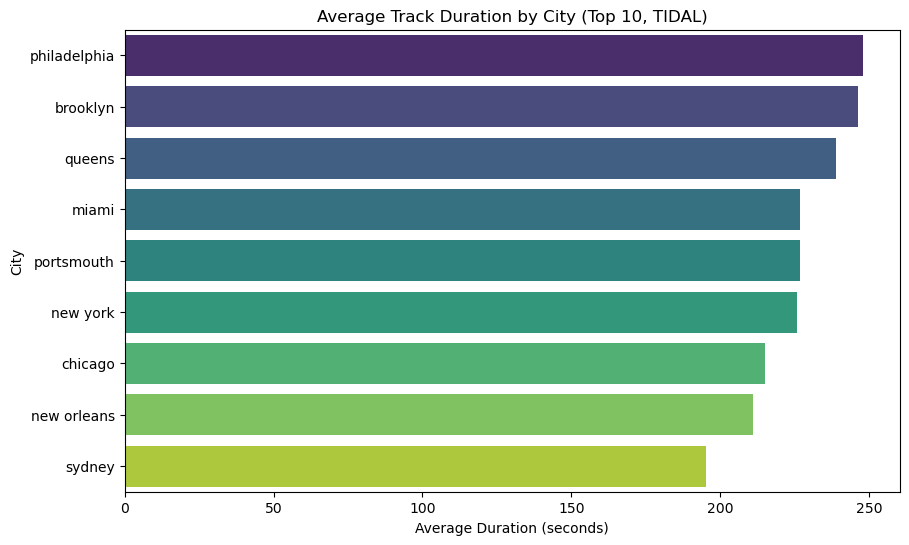

In [61]:
city_duration = tidal_df.groupby('city_clean')['duration'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=city_duration.values,
    y=city_duration.index,
    hue=city_duration.index,
    palette='viridis',
    legend=False
)
plt.title('Average Track Duration by City (Top 10, TIDAL)')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('City')
plt.show()

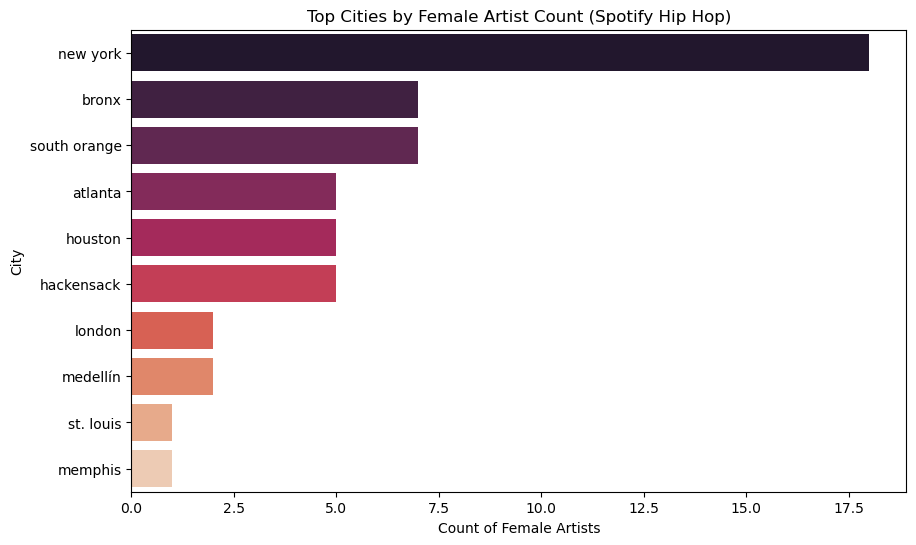

In [63]:
# Filter only female rows
female_artists = spotify_hiphop_df[spotify_hiphop_df['gender'] == 'female']

# Count female artists per city
female_city_counts = female_artists['city_clean'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=female_city_counts.values,
    y=female_city_counts.index,
    hue=female_city_counts.index,
    palette='rocket',
    legend=False
)
plt.title('Top Cities by Female Artist Count (Spotify Hip Hop)')
plt.xlabel('Count of Female Artists')
plt.ylabel('City')
plt.show()

# 5. Inferential Statistics

In this section, I will use statistical hypothesis testing to investigate whether observed differences in the data are statistically significant. I will:

- Formulate null ypotheses
- Use t-tests to compare group means (track durations or rankings across genders or cities)
- Report p-values to assess statistical significance

A p-value < 0.05 indicates the difference is unlikely due to chance, meaning I can reject the null hypothesis.

**HYPOTHESIS 1: Track duration has no impact on a song's success.**

In [78]:
from scipy.stats import ttest_ind

# Convert duration from ms to seconds
spotify_hiphop_df['duration'] = spotify_hiphop_df['duration (ms)'] / 1000

# Define a hit as included in the Top 40
spotify_hiphop_df['is_hit'] = (spotify_hiphop_df['ranking'] <= 40).astype(int)

# Split into hit and non-hit durations 
hit_durations = spotify_hiphop_df[spotify_hiphop_df['is_hit'] == 1]['duration']
non_hit_durations = spotify_hiphop_df[spotify_hiphop_df['is_hit'] == 0]['duration']

# T-test
t_stat, p_val = ttest_ind(hit_durations, non_hit_durations, equal_var=False)

print("T-Test: Track Duration — Hit vs Non-Hit (Spotify Hip-Hop)")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Track durations differ significantly between hits and non-hits. Reject the null hypothesis.")
else:
    print("No significant difference in track durations. Fail to reject the null hypothesis.")

T-Test: Track Duration — Hit vs Non-Hit (Spotify Hip-Hop)
T-statistic: -0.709
P-value: 0.604
No significant difference in track durations. Fail to reject the null hypothesis.


In [81]:
# Create a column counting how many times each artist appears
artist_counts = tidal_df['artist'].value_counts()
tidal_df['is_hit'] = tidal_df['artist'].apply(lambda x: 1 if artist_counts[x] > 1 else 0)

# Split into hit and non-hit durations
hit_durations = tidal_df[tidal_df['is_hit'] == 1]['duration']
non_hit_durations = tidal_df[tidal_df['is_hit'] == 0]['duration']

# T-test
t_stat, p_val = ttest_ind(hit_durations, non_hit_durations, equal_var=False)

print("T-Test: Track Duration — Hit vs Non-Hit (TIDAL)")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Track durations differ significantly. Reject the null hypothesis.")
else:
    print("No significant difference in track durations. Fail to reject the null.")

T-Test: Track Duration — Hit vs Non-Hit (TIDAL)
T-statistic: 0.892
P-value: 0.385
No significant difference in track durations. Fail to reject the null.


These two separate t-tests on the Spotify Hip Hop dataset and the TIDAL dataset show no statistically significant difference in average track durations between hits and non-hits (Spotify: p = 0.604; TIDAL: p = 0.385). Therefore, track duration alone does not influence whether a song becomes successful.

**HYPOTHESIS 2: The hit rate (over 100M streams) is the same across all cities.**

In [233]:
from scipy.stats import chi2_contingency

# Define hit threshold
hit_threshold = 100_000_000  

# Filter female artists 
female_df = spotify_10k_df[spotify_10k_df['gender'] == 'female']

# Top 3 cities 
top_cities = female_df['city'].value_counts().head(3).index.tolist()

# Build contingency table: rows = cities, columns = [hit, not hit]
contingency = []
for city in top_cities:
    group = female_df[female_df['city'] == city]
    hits = (group['total_streams'] > hit_threshold).sum()
    non_hits = (group['total_streams'] <= hit_threshold).sum()
    contingency.append([hits, non_hits])

# Chi-Squared test
chi2, p_val, dof, expected = chi2_contingency(contingency)

print("Chi-Squared Test: Hit Rate by City (Female Artists)")
print(f"Cities compared: {top_cities}")
print(f"Chi²-statistic: {chi2:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Significant difference in hit rate. Reject H₀.")
else:
    print("No significant difference. Fail to reject H₀.")

Chi-Squared Test: Hit Rate by City (Female Artists)
Cities compared: ['Houston, TX', 'New York, NY', 'Los Angeles, CA']
Chi²-statistic: 16.261
P-value: 0.000
Significant difference in hit rate. Reject H₀.


There is a significant difference in hit rate between the cities compared (Houston, New York and Los Angeles). Some cities are more likely to produce hits by female rappers.

**HYPOTHESIS 3: All cities have the same expected number of female rappers.**

In [83]:
from scipy.stats import chisquare

# Filter female artists 
female_df = spotify_hiphop_df[spotify_hiphop_df['gender'] == 'female']

# Count female rappers per city
city_counts = female_df['city_clean'].value_counts()

# Observed vs expected (equal number of rappers per city)
observed = city_counts.values
expected = [sum(observed) / len(observed)] * len(observed)

# Chi-Squared Goodness-of-Fit test
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Chi-Squared Goodness-of-Fit: Female Rappers per City")
print(f"Chi²-statistic: {chi2_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Significant difference. Reject the null hypothesis — female rapper counts are unevenly distributed across cities.")
else:
    print("No significant difference. Fail to reject the null — distribution may be uniform.")

Chi-Squared Goodness-of-Fit: Female Rappers per City
Chi²-statistic: 68.509
P-value: 0.000
Significant difference. Reject the null hypothesis — female rapper counts are unevenly distributed across cities.


Female rapper representation is uneven across cities and some cities are overrepresented.

# 6. Feature Engineering & Selection

In this section, I will prepare the data for modeling by adding new columns, cleaning up existing ones, and picking the most useful features. This includes: 

- Creating new features (whether a song is a hit or not)
- Encoding categorical variables (like city and gender)
- Handling missing values
- Normalizing or transforming uneven values
- Identifying the best features to help me make predictions.

In [103]:
import numpy as np

# Define a hit as > 100 million streams
spotify_10k_df['is_hit'] = spotify_10k_df['total_streams'] > 100_000_000

# Convert boolean to integer (0 or 1)
spotify_10k_df['is_hit'] = spotify_10k_df['is_hit'].astype(int) 

# Add a log_total_streams column
spotify_10k_df['log_total_streams'] = np.log1p(spotify_10k_df['total_streams'])

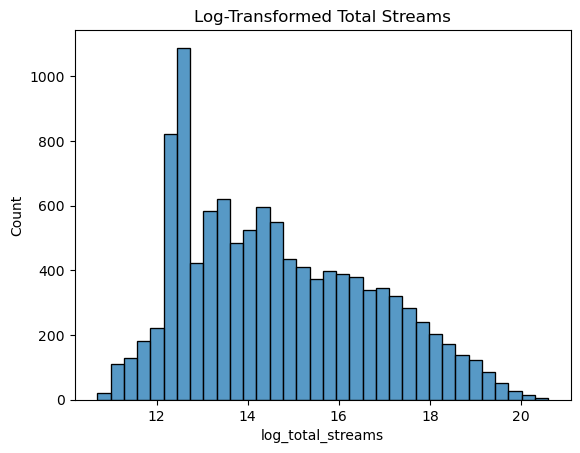

In [105]:
sns.histplot(spotify_10k_df['log_total_streams'])
plt.title('Log-Transformed Total Streams')
plt.show()

In [119]:
# Limit to top 10 cities
top_cities = spotify_10k_df['city'].value_counts().head(10).index
spotify_10k_df['city_cleaned'] = spotify_10k_df['city'].apply(lambda x: x if x in top_cities else 'Other')

# One-hot encode city_cleaned and gender
spotify_encoded = pd.get_dummies(spotify_10k_df, columns=['city_cleaned', 'gender'], drop_first=True)

In [121]:
# 1 for female and 0 for male 
spotify_encoded['is_female'] = 1 - spotify_encoded['gender_male']

In [123]:
# Create log_total_streams column
spotify_encoded['log_total_streams'] = np.log1p(spotify_encoded['total_streams'])

In [117]:
# Select features
features = spotify_encoded[[
    'log_total_streams',
    'is_female',
    'city_cleaned_Los Angeles, CA',
    'city_cleaned_New York, NY',
    'city_cleaned_Houston, TX'  
]]

# Define target variable 
target = spotify_encoded['is_hit']

I can now see that features like stream counts, track durations, and peak chart positions relate to each other and to city-specific success.

Using visualizations and correlation metrics helped me identify: 
- A skewed distribution of stream counts, indicating a small number of very successful tracks. 
- Strong differences in female representation across cities. 
- Relationships between total streams and chart metrics, suggesting certain cities may amplify success. 

These relationships are critical in shaping the feature engineering decisions that follow.

# Conclusion

This exploratory data analysis revealed that:

- Cities like Houston, New York and Los Angeles have a high representation of female rappers but also produce more hits than other cities. 
- The number of hits and female rappers varies significantly across cities.
- Streaming metrics and chart performance highly vary depending on the location.
- Track duration does not impact a song’s success.

These findings suggest that certain cities are more likely to produce future hits by female rappers. They could be used to build a predictive model, where city, gender, and stream counts can help forecast future success.